## 1 - Packages ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## 2 - Setup data

In [11]:
# Read data from file and create train set
X1 = np.asarray([[np.sqrt(5), 3],
                [0, 0],
                [np.sqrt(7), 1]])
X2 = np.asarray([[-np.sqrt(5),-3],
                 [-np.sqrt(7),-1 ]])

In [12]:
#X1 = np.asarray([[np.sqrt(3/2), 0],
#                [0, 0],
#                [1, 1]])
#X2 = np.asarray([[-np.sqrt(3/2),0],
#                 [-1, -1]])

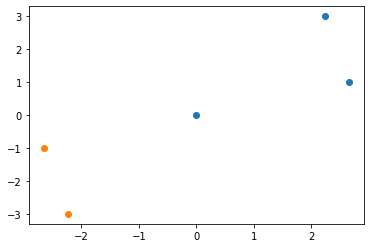

In [13]:
# Show results in the plot
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

## 3 -  Principal Component Analysis

### 3.1 -  Covariance matrix

In [20]:
class Eigendecomposition():
        
    def covariance(self, X):
        """
        Calculates covariance matrix for one class
        
        Arguments:
        X -- normalized input matrix with shape (n_examples, n_features) 
        
        Returnes:
        covariance matrix with shape (n_features, n_features)
        """
        
        n = X.shape[0]
        A = np.dot(np.transpose(X), X) / n
        
        return A
    def covariance_classes(self, Xs):
        """
        Calculates covariance matrix for several class
        Xs -- list of normalized input matrix with shape (n_examples, n_features) 
        
        Returnes:
        united covariance matrix
        """
        n = Xs[0].shape[1]
        A = np.zeros((n, n))
        for X in Xs:
            A = A + self.covariance(X)
        A = A * (1/len(Xs))
        return A
        

In [21]:
A = Eigendecomposition().covariance_classes([X1, X2])
cov_vals, cov_vect = np.linalg.eig(A)
cov_vect

array([[ 0.74374085, -0.66846806],
       [ 0.66846806,  0.74374085]])

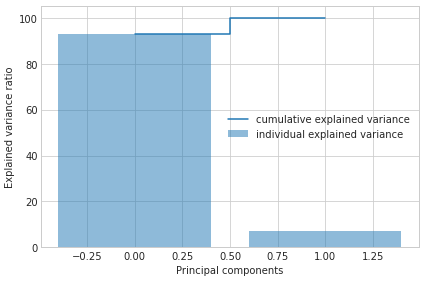

In [22]:
tot = sum(cov_vals)
var_exp = [(i / tot)*100 for i in sorted(cov_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    n = len(var_exp)
    plt.bar(range(n), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(n), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

In [23]:
class PCA():
    """
    Parameters:
    -----------
    Xs -- list of matrix of input features of shape (n_examples, n_features) 
    n -- number of principal components
    """
    
    def __init__(self, Xs, n, eigendecomposition):
        self.Xs = Xs
        self.n = n
        self.eigendecomposition = eigendecomposition
        self.X = None
        self.S = None
        self.Y = None
        
        
    def transform(self):
        """
        Transforms the samples into the new subspace
        
        Returns:
        transformed -- reduced matrix of input features with shape (n_samples, n)
        matrix_w -- matrix of n eigenvectors with largest eigenvalues with shape (n_features, n)
        """
        A = self.eigendecomposition(self.Xs)
        e_val, e_vect = np.linalg.eig(A)
        idx = np.argsort(-1 * e_val)[:self.n]
        e_val = e_val[idx]
        e_vect = e_vect[:,idx]
        self.X = np.concatenate(self.Xs, axis = 0)
        self.S = e_vect
        self.Y = self.X @ self.S

        return self.Y, self.S

        
    def restore(self):
        """
        Restores "original" values

        Returns:
        matrix with shape (n_features, n_examples), 
            containing restored values depending on reduced input matrix of features   
        """
        X_norm = self.Y @ self.S.T
        return X_norm


In [24]:
X = np.concatenate([X1, X2], axis=0)
X

array([[ 2.23606798,  3.        ],
       [ 0.        ,  0.        ],
       [ 2.64575131,  1.        ],
       [-2.23606798, -3.        ],
       [-2.64575131, -1.        ]])

In [25]:
pca = PCA([X1, X2], 1, Eigendecomposition().covariance_classes)

Reducing of input matrix dimencion:

In [26]:
reduced_x, reduced_eigenvects = pca.transform()
print('Reduced input matrix:')
print(reduced_x)

Reduced input matrix:
[[ 3.66845928]
 [ 0.        ]
 [ 2.6362214 ]
 [-3.66845928]
 [-2.6362214 ]]


Let's plot our reduced data and compare it with original:

In [27]:
new_x = pca.restore()
print('Restored:')
print(new_x)

Restored:
[[ 2.72838303  2.45224784]
 [ 0.          0.        ]
 [ 1.96066555  1.76222979]
 [-2.72838303 -2.45224784]
 [-1.96066555 -1.76222979]]


In [28]:
reduced_eigenvects

array([[0.74374085],
       [0.66846806]])

Visualising of initial and restored values:

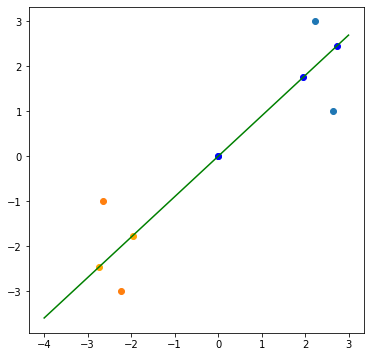

In [33]:
figure(figsize=(6, 6))
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
# x/e[0] = y/e[1]
# y = e[1]/e[0] * x
x = np.arange(-4, 4)
e = reduced_eigenvects
y = e[1] * x / e[0]
plt.plot(x, y, color = "green")
plt.scatter(new_x[0:3, 0], new_x[0:3, 1], color='blue')
plt.scatter(new_x[3:5, 0], new_x[3:5, 1], color='orange')
plt.show()